In [12]:
library(fpp2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.2     v fma       2.4  
v forecast  8.13      v expsmooth 2.3  





## Time Series Objects and Moving Averages

In [3]:
sales <- c(18, 33, 41,  7, 34, 35, 24, 25, 24, 21, 25, 20, 
           22, 31, 40, 29, 25, 21, 22, 54, 31, 25, 26, 35)
y <- ts(sales, start = c(2003,1), frequency = 12)
y

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,18,33,41,7,34,35,24,25,24,21,25,20
2004,22,31,40,29,25,21,22,54,31,25,26,35


In [10]:
w <- ts(sales, start = c(2003,2), frequency = 12)
w

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,,18,33,41,7,34,35,24,25,24,21,25
2004,20,22,31,40,29,25,21,22,54,31,25,26
2005,35,,,,,,,,,,,


In [5]:
z <- ts(sales, start = 2003, frequency = 12)
z

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,18,33,41,7,34,35,24,25,24,21,25,20
2004,22,31,40,29,25,21,22,54,31,25,26,35


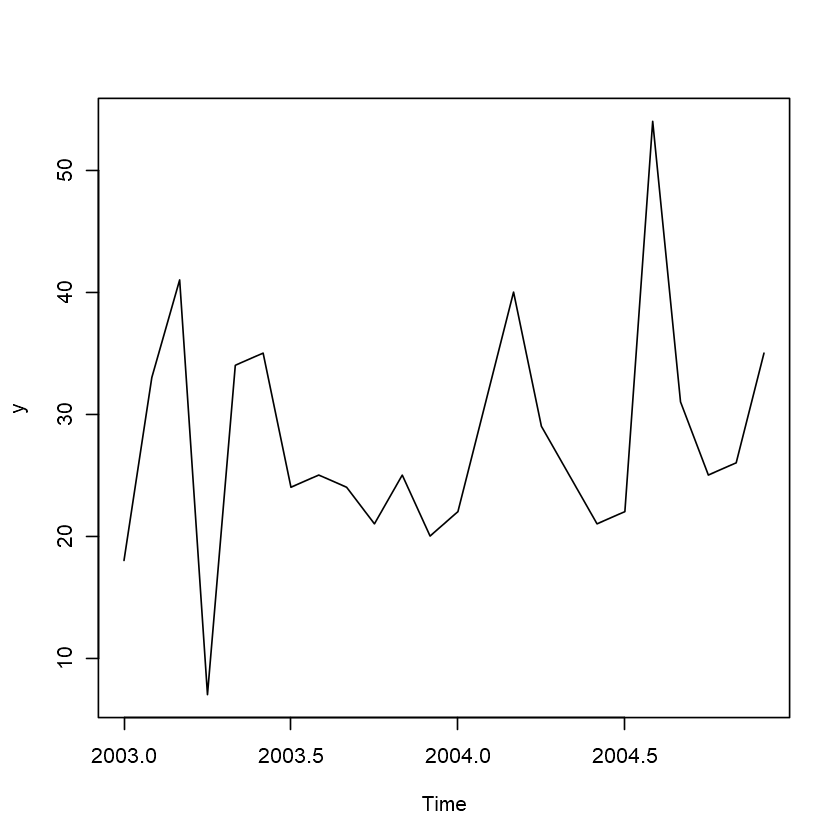

In [6]:
plot(y)

In [7]:
start(y)

[1] 2003    1

In [8]:
end(y)

[1] 2004   12

In [9]:
frequency(y)

[1] 12

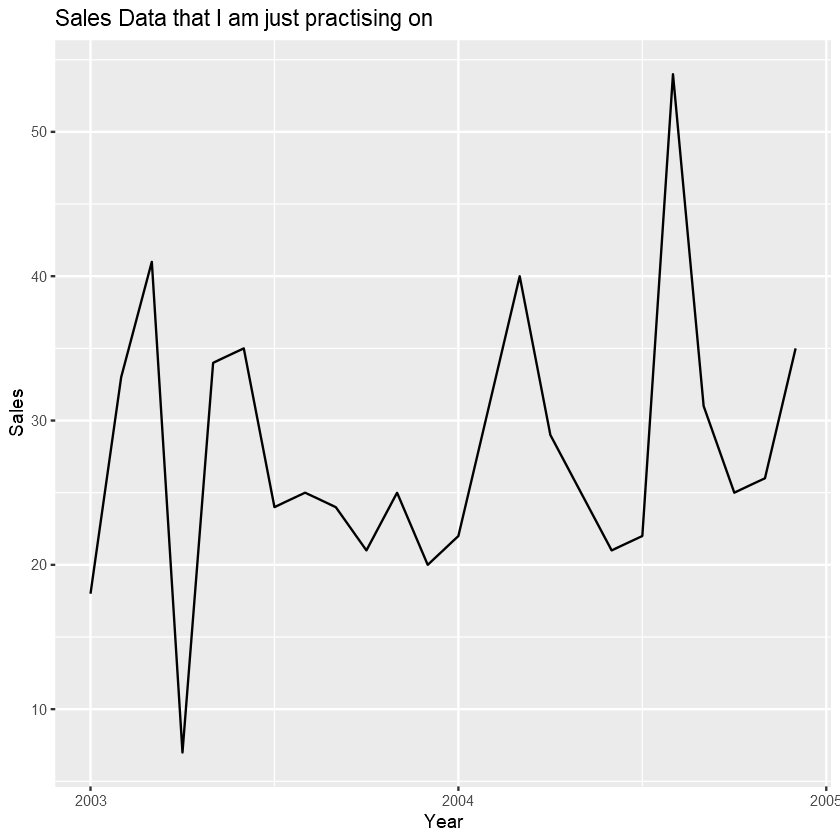

In [14]:
autoplot(y) + ggtitle("Sales Data that I am just practising on") + ylab("Sales") + xlab("Year")

In [17]:
y.subset <- window(y, start = c(2003, 3), end = c(2004, 4))
y.subset

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,,,41,7,34,35,24,25,24,21,25,20
2004,22,31,40,29,,,,,,,,


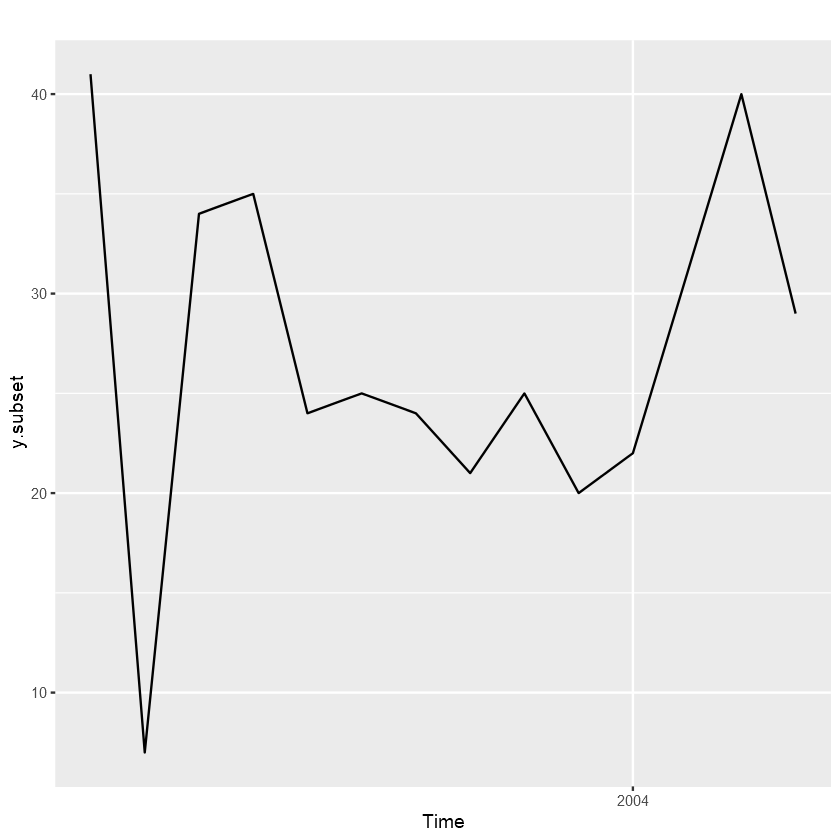

In [18]:
autoplot(y.subset)

In [19]:
Nile

A Time Series:
  [1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740

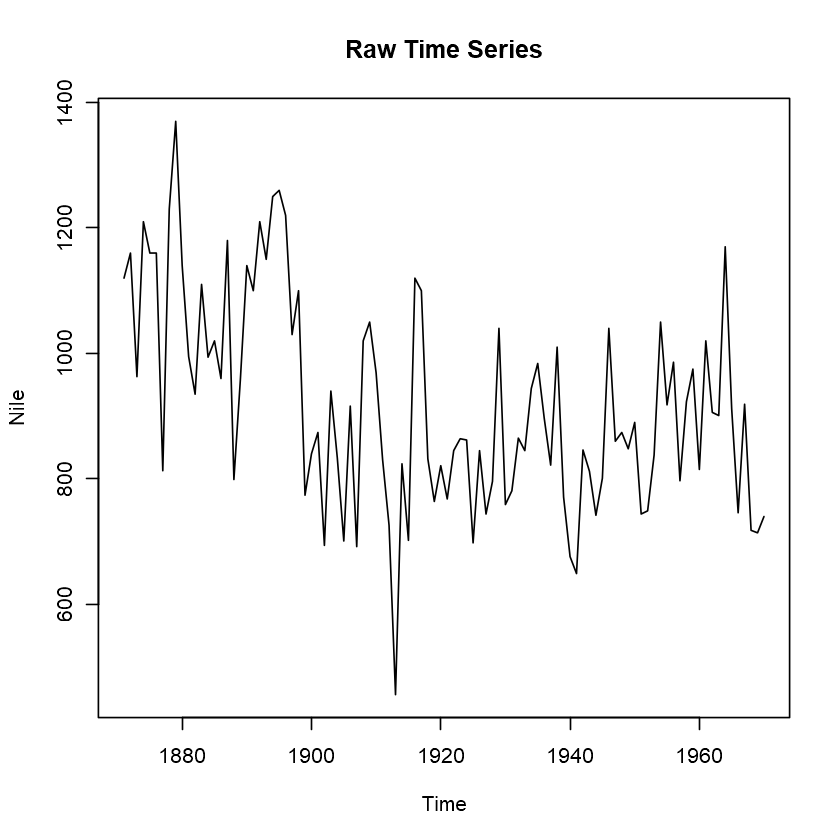

In [20]:
plot(Nile, main = "Raw Time Series")

Plotting the moving averages

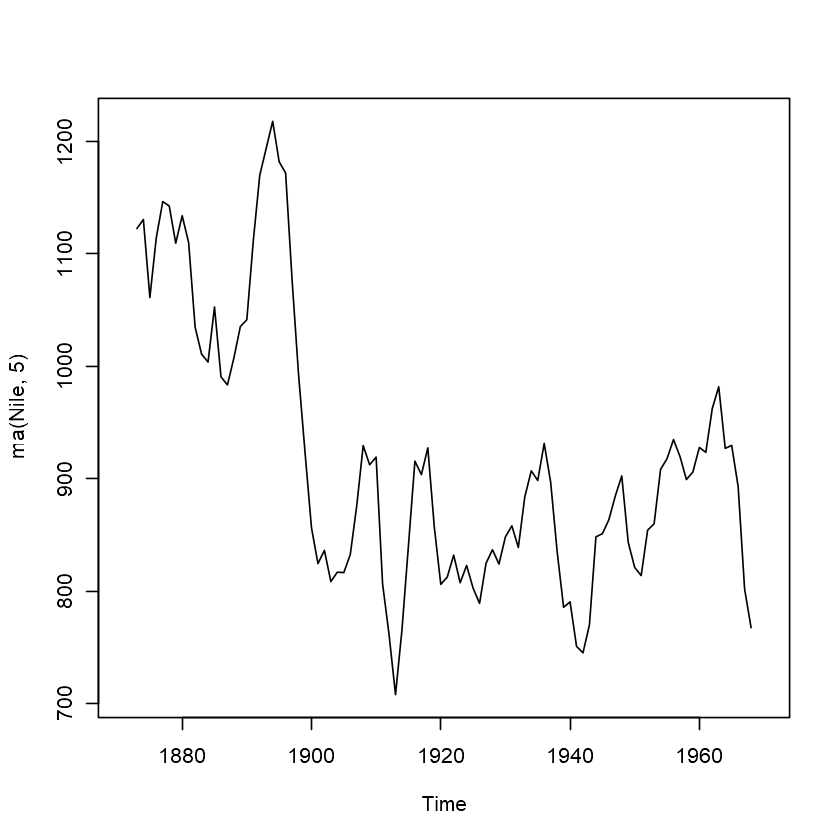

In [21]:
plot(ma(Nile, 5))

Warning message:
"Removed 6 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


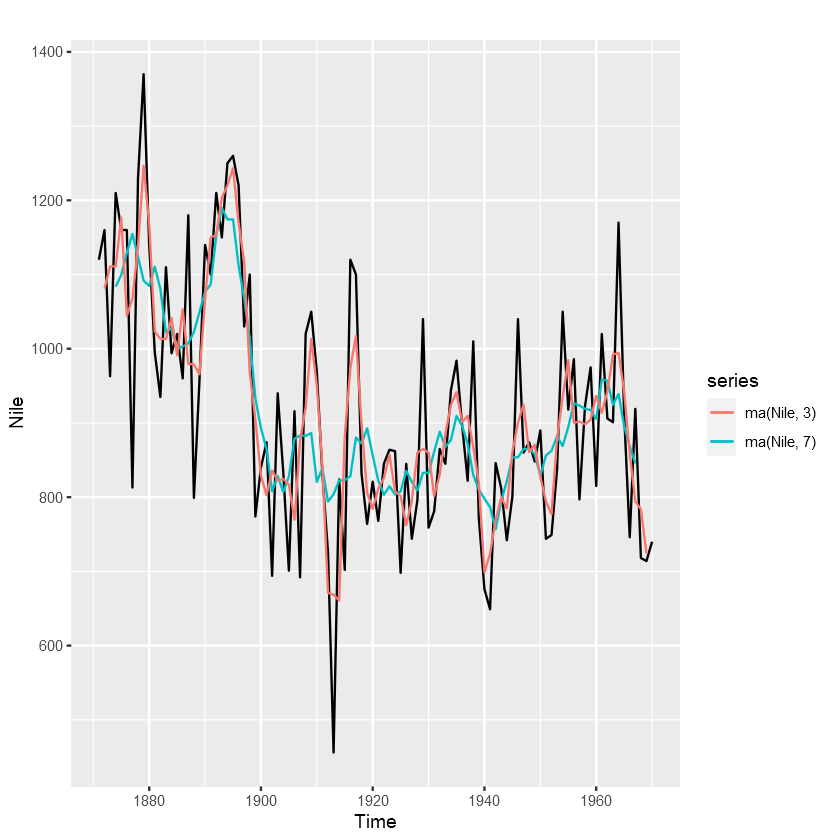

In [22]:
autoplot(Nile) + autolayer(ma(Nile, 7)) + autolayer(ma(Nile,3))

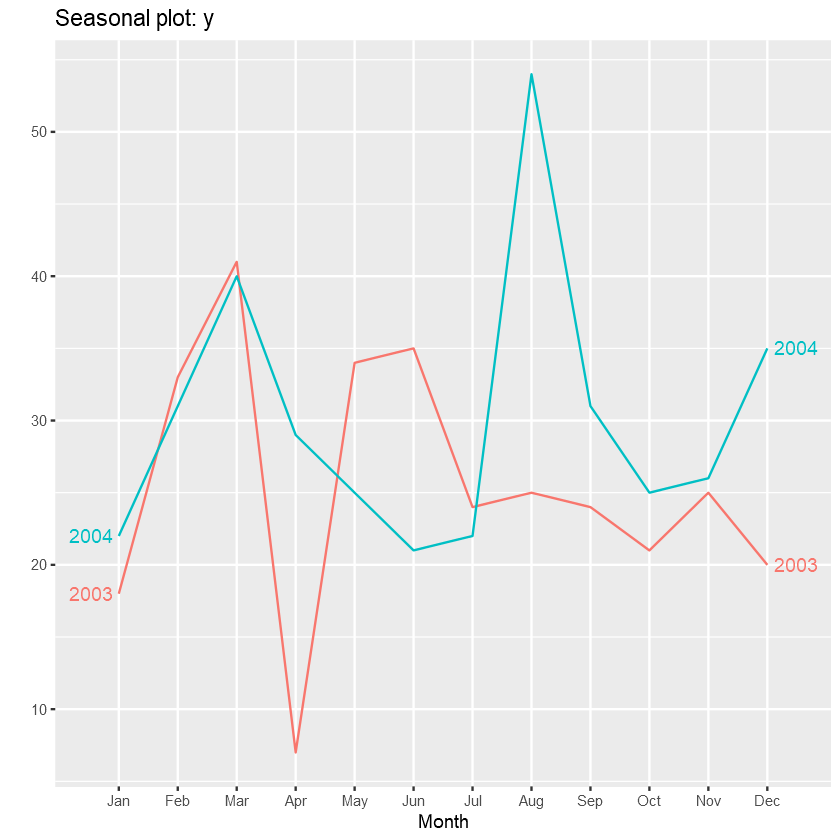

In [24]:
ggseasonplot(y, year.labels = TRUE, year.labels.left = TRUE)

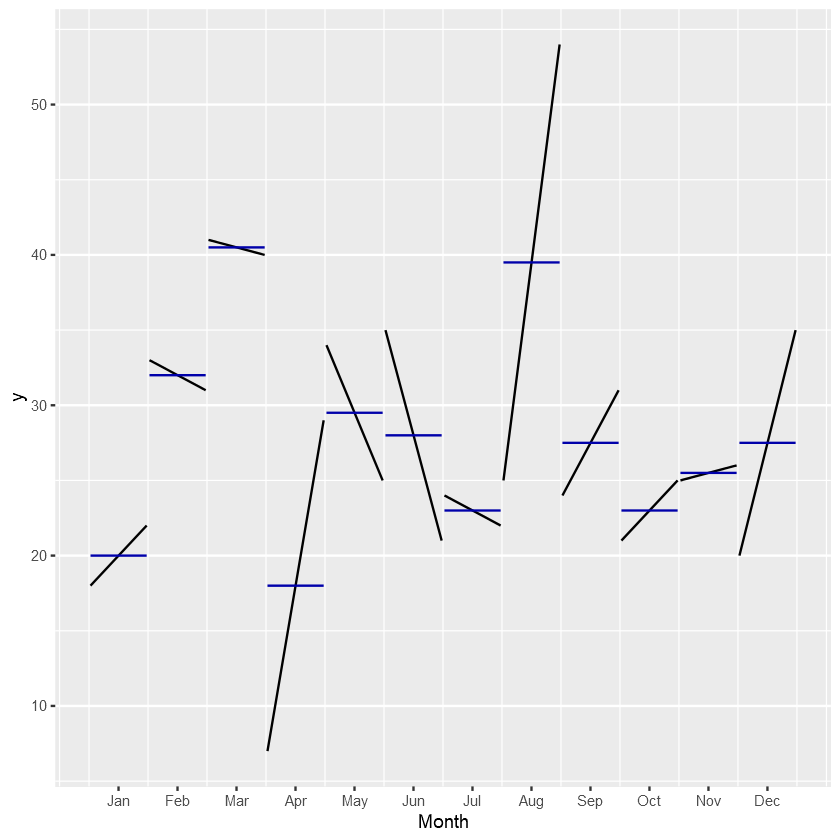

In [25]:
ggsubseriesplot(y)

## Seasonal Decomposition

In [26]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


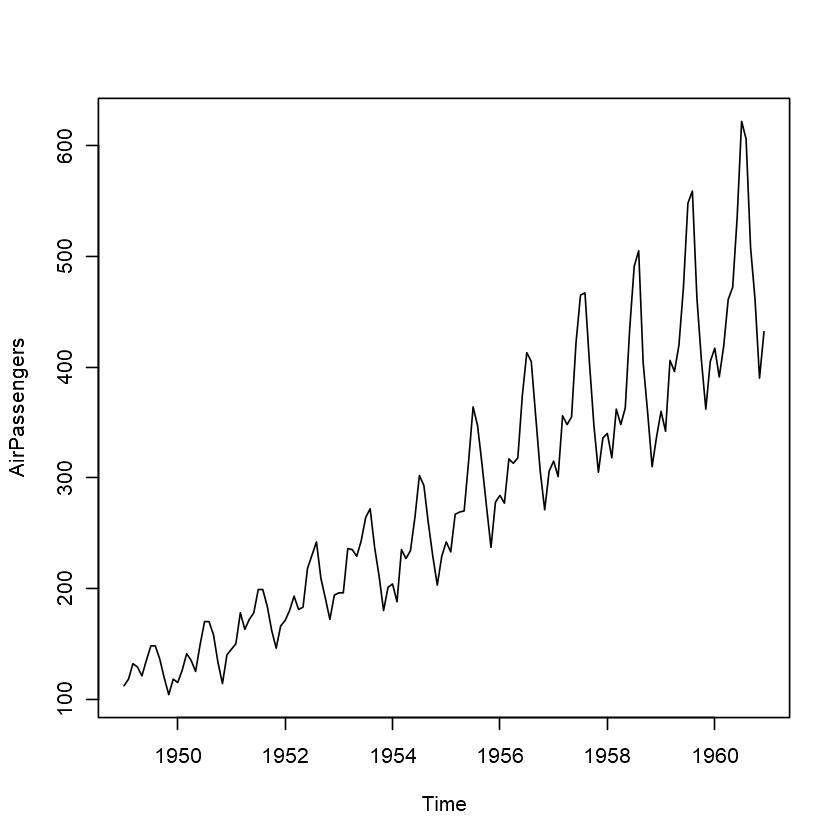

In [27]:
plot(AirPassengers)

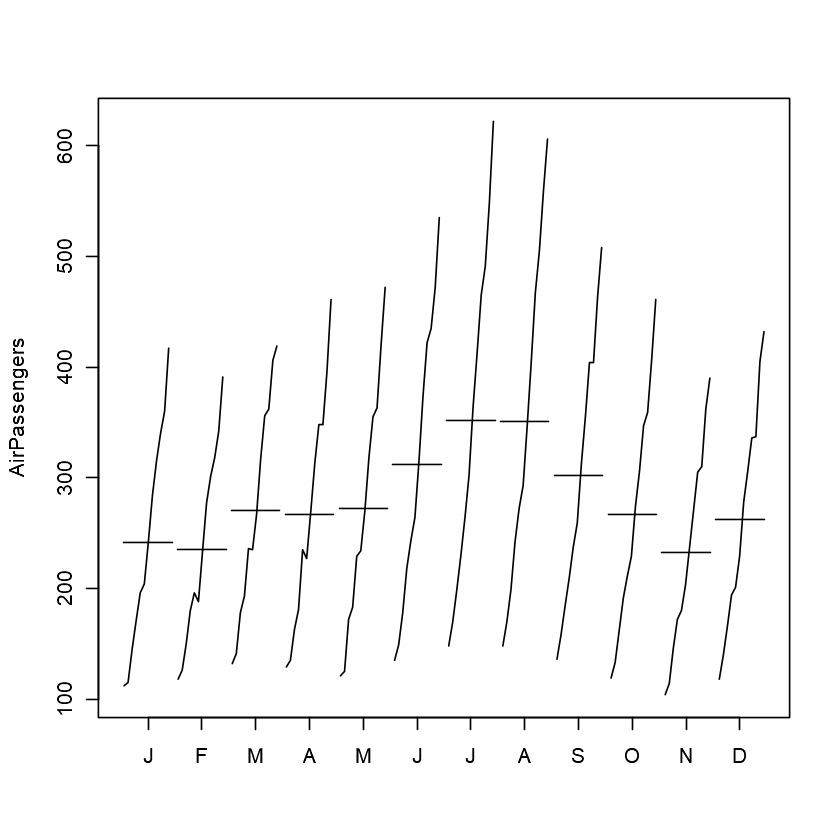

In [28]:
monthplot(AirPassengers)

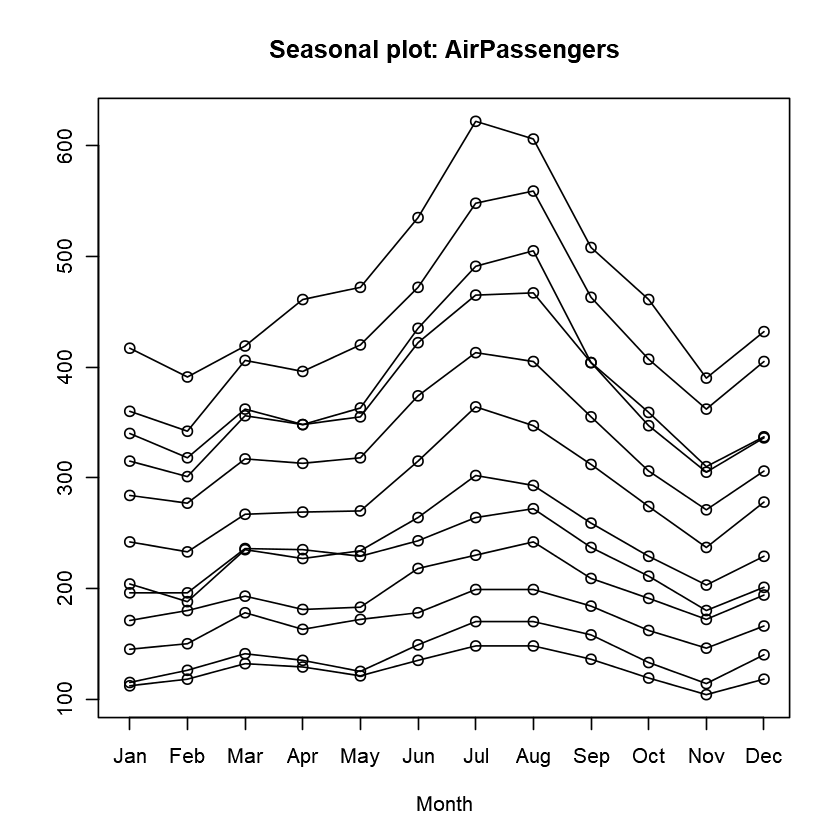

In [29]:
seasonplot(AirPassengers)

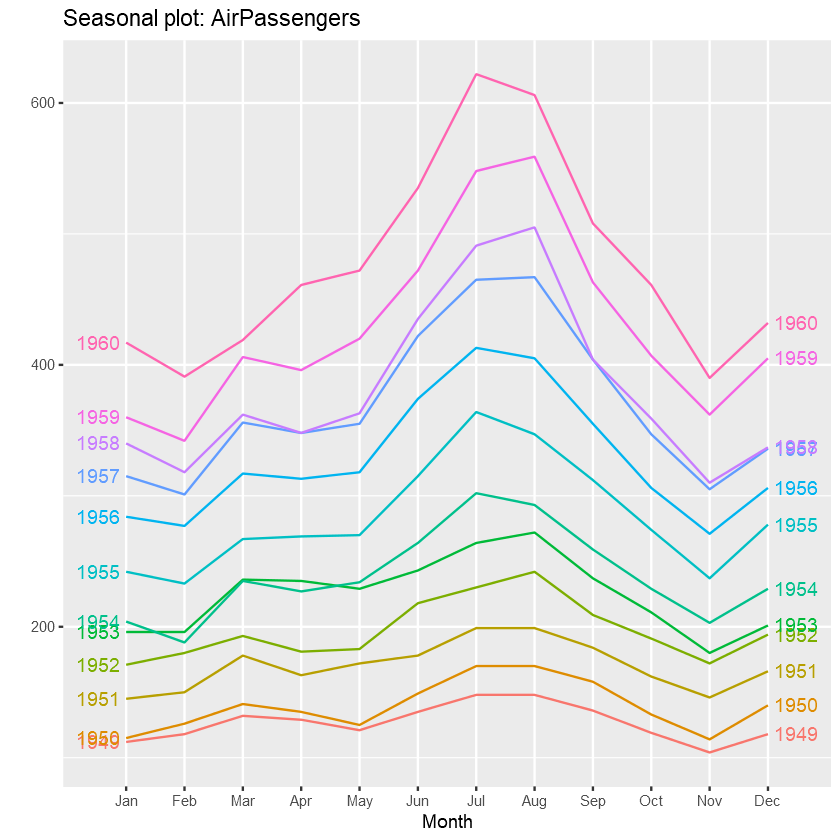

In [30]:
ggseasonplot(AirPassengers, year.labels = TRUE, year.labels.left = TRUE)

## Fitting the Additive and Multiplicative Models for seasonal decomposition of the data

Additive

In [31]:
fit.decadd <- decompose(AirPassengers, type = "additive")
fit.decadd

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1949 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1950 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1951 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1952 -24.7487

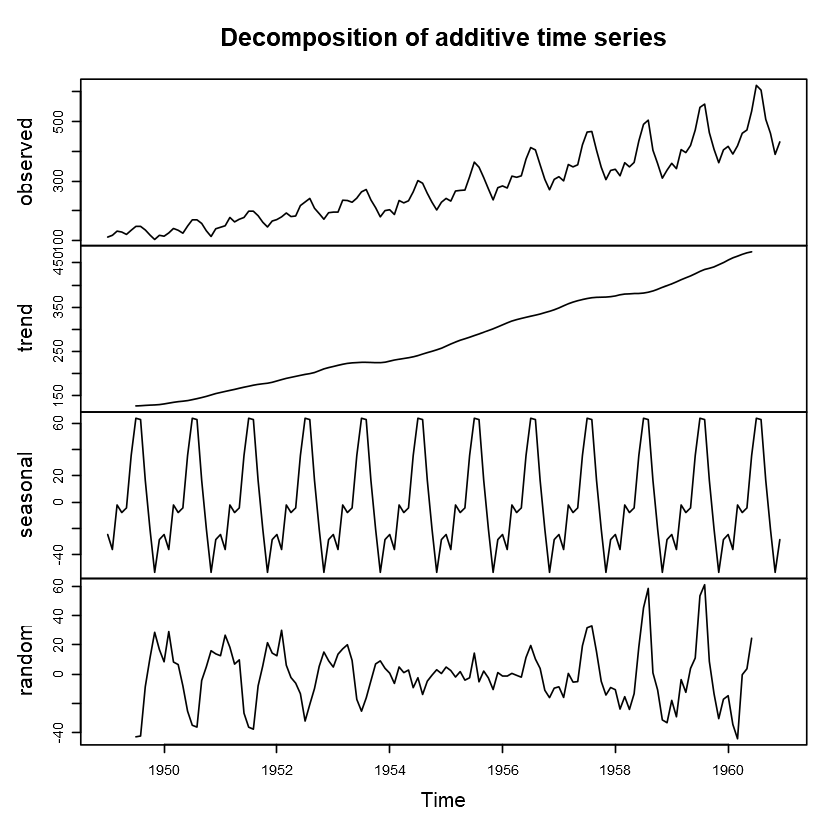

In [32]:
plot(fit.decadd)

Multiplicative

In [34]:
fit.decmult <- decompose(AirPassengers, type = "multiplicative")
fit.decmult

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
           Jan       Feb       Mar       Apr       May       Jun       Jul
1949 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1950 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.2265555
1951 0.9102304 0.8836253 1.0073663 0.9759060 0.9813780 1.1127758 1.22655

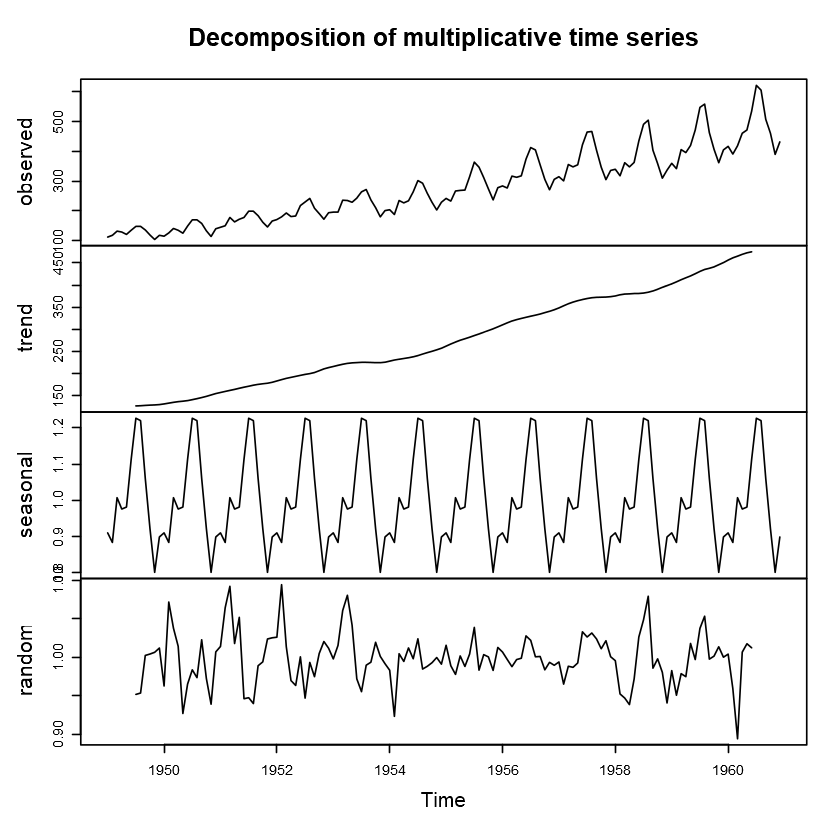

In [36]:
plot(fit.decmult)

Seasonal Decomposition using stl()

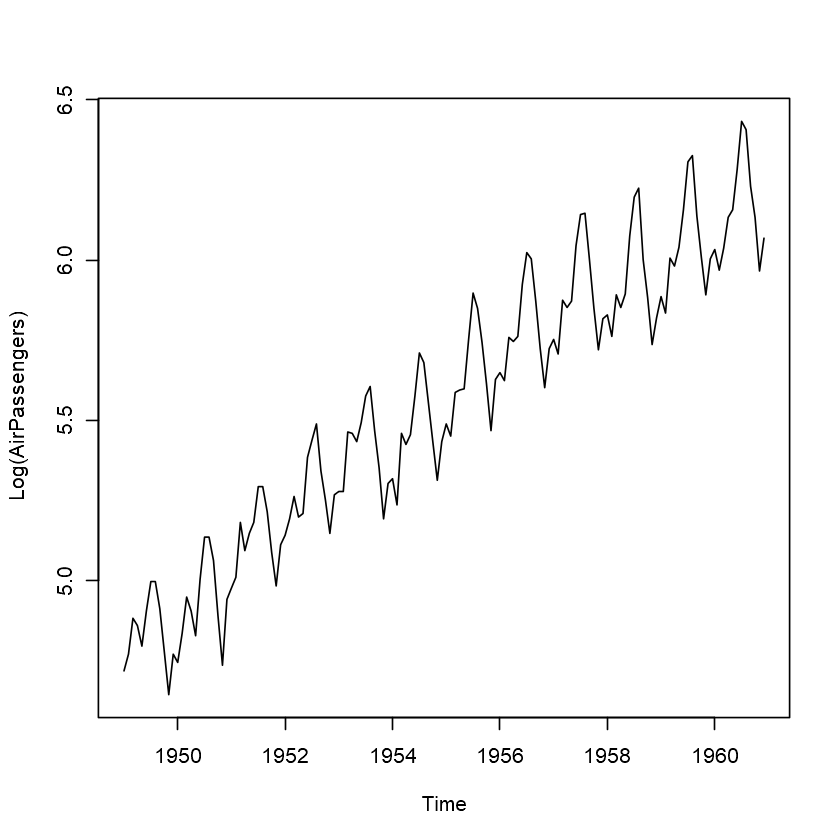

In [38]:
lap <- log(AirPassengers)
plot(lap, ylab = 'Log(AirPassengers)')

In [39]:
fit.stl <- stl(lap, s.window = 'period')

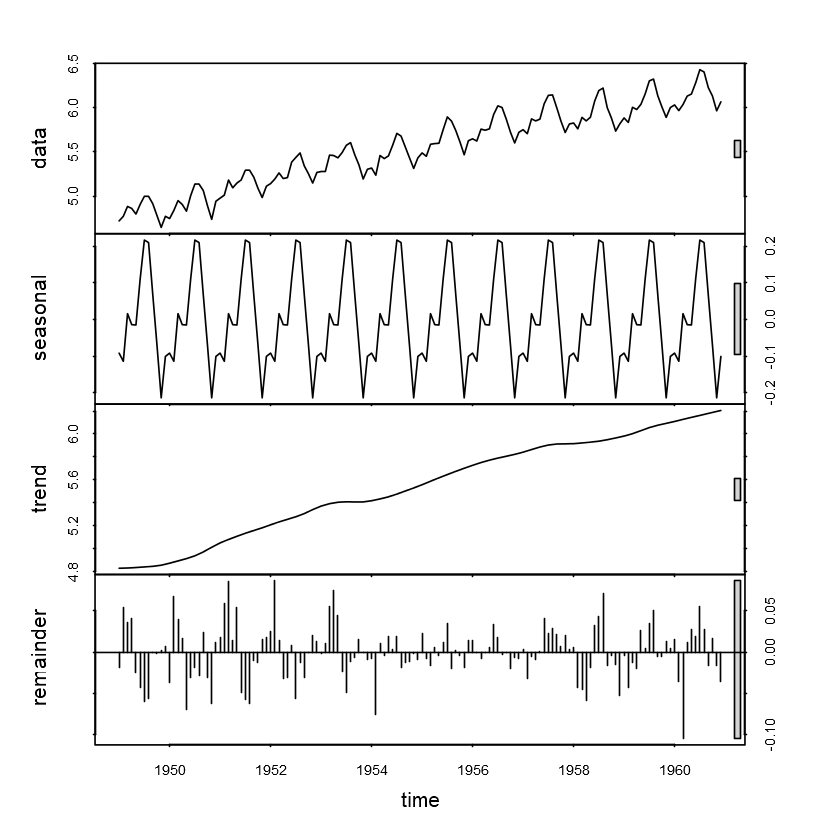

In [42]:
# fit.stl
plot(fit.stl)